In [1]:
import tensorflow as tf

In [2]:
from tensorflow import keras
from keras.layers import Input, Dense
from keras.models import Model
from keras.datasets import mnist
import numpy as np
(x_train, _), (x_test, _) = mnist.load_data()

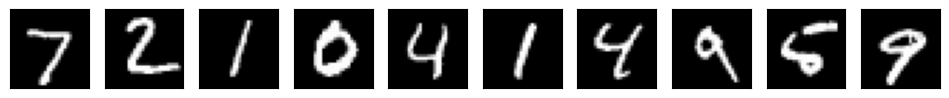

In [3]:
import matplotlib.pyplot as plt
%matplotlib inline

n = 10  # how many records we will display
plt.figure(figsize=(12, 4))
for i in range(n):
    # display original
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

plt.show()

![image.png](attachment:image.png)

In [4]:
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Dense, Conv2D, MaxPool2D, Flatten, UpSampling2D, Reshape

In [22]:
encode_model = Sequential()

############
# Encoding #
############

## FIRST SET OF LAYERS
# CONVOLUTIONAL LAYER
encode_model.add(Conv2D(filters=16, kernel_size=(3,3), input_shape=(28, 28, 1), activation='relu', padding='same'))
# POOLING LAYER
encode_model.add(MaxPool2D(pool_size=(2, 2),  padding='same'))

## SECOND SET OF LAYERS
# CONVOLUTIONAL LAYER
encode_model.add(Conv2D(filters=8, kernel_size=(3,3), activation = 'relu', padding='same'))
# POOLING LAYER
encode_model.add(MaxPool2D(pool_size=(2, 2), padding='same'))

## THIRD SET OF LAYERS
# CONVOLUTIONAL LAYER
encode_model.add(Conv2D(filters=8, kernel_size=(3,3), activation='relu', padding='same'))
# POOLING LAYER
encode_model.add(MaxPool2D(pool_size=(2, 2), padding='valid'))
encode_model.add(Flatten(input_shape=[7,7,8]))
encode_model.add(Dense(7*7*8, activation="relu"))
encode_model.add(Dense(30, activation="relu"))

In [34]:
############
# Decoding #
############
decode_model=Sequential()

# DeConv1
#decode_model.add(Conv2D(filters=8, kernel_size=(3,3), activation='relu', padding='same'))
# Upsampling LAYER
#decode_model.add(UpSampling2D((2, 2)))

decode_model.add(Dense(7*7*8,activation="relu"))
decode_model.add(Reshape([7,7,8]))

# DeConv2
decode_model.add(Conv2D(filters=8, kernel_size=(3,3), activation='relu', padding='same'))
# Upsampling LAYER
decode_model.add(UpSampling2D((2, 2)))

# Deconv3
decode_model.add(Conv2D(filters=16, kernel_size=(3,3), activation='relu', padding='same'))
# POOLING LAYER
decode_model.add(UpSampling2D((2, 2)))

decode_model.add(Conv2D(1, kernel_size=(3,3), activation='sigmoid', padding='same'))


In [35]:
autoencoder = Sequential([encode_model, decode_model])

In [36]:
encode_model.compile(optimizer='adam', loss='binary')

In [37]:
autoencoder.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential_3 (Sequential)   (None, 30)                42310     
                                                                 
 sequential_6 (Sequential)   (None, 28, 28, 1)         14049     
                                                                 
Total params: 56359 (220.15 KB)
Trainable params: 56359 (220.15 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [38]:
encode_model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 28, 28, 16)        160       
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 14, 14, 16)        0         
 g2D)                                                            
                                                                 
 conv2d_7 (Conv2D)           (None, 14, 14, 8)         1160      
                                                                 
 max_pooling2d_4 (MaxPoolin  (None, 7, 7, 8)           0         
 g2D)                                                            
                                                                 
 conv2d_8 (Conv2D)           (None, 7, 7, 8)           584       
                                                                 
 max_pooling2d_5 (MaxPoolin  (None, 3, 3, 8)          

In [39]:
decode_model.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_6 (Dense)             (None, 392)               12152     
                                                                 
 reshape_2 (Reshape)         (None, 7, 7, 8)           0         
                                                                 
 conv2d_13 (Conv2D)          (None, 7, 7, 8)           584       
                                                                 
 up_sampling2d_5 (UpSamplin  (None, 14, 14, 8)         0         
 g2D)                                                            
                                                                 
 conv2d_14 (Conv2D)          (None, 14, 14, 16)        1168      
                                                                 
 up_sampling2d_6 (UpSamplin  (None, 28, 28, 16)        0         
 g2D)                                                 

In [40]:
x_train = x_train.reshape(60000,28,28,1)
x_train = x_train/255
x_train.shape

(60000, 28, 28, 1)

In [41]:
x_test = x_test.reshape(10000, 28, 28, 1)
x_test = x_test/255
x_test.shape

(10000, 28, 28, 1)

In [42]:
autoencoder.compile(optimizer = 'adam',
                    loss = 'binary_crossentropy',
                    metrics = ['accuracy'])

In [43]:
# Train the model
autoencoder.fit(x=x_train, y=x_train,  epochs=10, batch_size=128, shuffle=True, verbose=1, validation_data=(x_test, x_test))

Epoch 1/10
469/469 [==============================] - 11s 22ms/step - loss: 0.0495 - accuracy: 0.8085 - val_loss: 8.3778e-05 - val_accuracy: 0.8072
Epoch 2/10
469/469 [==============================] - 10s 22ms/step - loss: 3.6208e-05 - accuracy: 0.8088 - val_loss: 2.7954e-05 - val_accuracy: 0.8072
Epoch 3/10
469/469 [==============================] - 11s 23ms/step - loss: 2.7167e-05 - accuracy: 0.8088 - val_loss: 2.7280e-05 - val_accuracy: 0.8072
Epoch 4/10
469/469 [==============================] - 11s 24ms/step - loss: 2.6904e-05 - accuracy: 0.8088 - val_loss: 2.7197e-05 - val_accuracy: 0.8072
Epoch 5/10
469/469 [==============================] - 11s 24ms/step - loss: 2.6861e-05 - accuracy: 0.8088 - val_loss: 2.7173e-05 - val_accuracy: 0.8072
Epoch 6/10
469/469 [==============================] - 12s 26ms/step - loss: 2.6841e-05 - accuracy: 0.8088 - val_loss: 2.7158e-05 - val_accuracy: 0.8072
Epoch 7/10
469/469 [==============================] - 13s 27ms/step - loss: 2.6827e-05 - acc

313/313 [==============================] - 1s 3ms/step


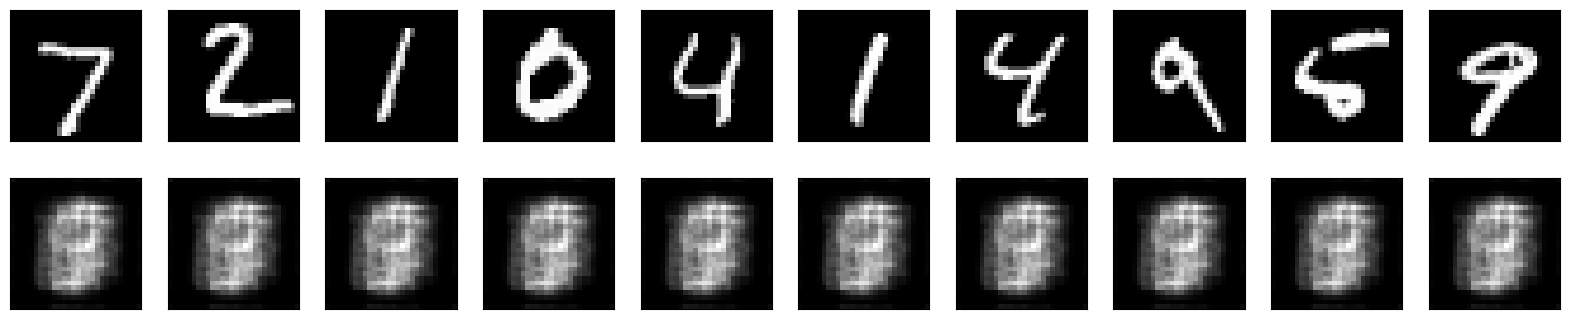

In [44]:
decoded_imgs = autoencoder.predict(x_test)

n = 10

plt.figure(figsize=(20, 4))
for i in range(n):
    # display original
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # display reconstruction
    ax = plt.subplot(2, n, i+1+n)
    plt.imshow(decoded_imgs[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)


In [17]:
autoencoder.fit(x_train, x_train,  epochs=5, batch_size=32, shuffle=True, verbose=1, validation_data=(x_test, x_test))

Epoch 1/5
1875/1875 [==============================] - 16s 8ms/step - loss: 0.1144 - accuracy: 0.8099 - val_loss: 0.1101 - val_accuracy: 0.8094
Epoch 2/5
1875/1875 [==============================] - 16s 9ms/step - loss: 0.1114 - accuracy: 0.8105 - val_loss: 0.1086 - val_accuracy: 0.8097
Epoch 3/5
1875/1875 [==============================] - 15s 8ms/step - loss: 0.1094 - accuracy: 0.8108 - val_loss: 0.1067 - val_accuracy: 0.8107
Epoch 4/5
1875/1875 [==============================] - 15s 8ms/step - loss: 0.1076 - accuracy: 0.8111 - val_loss: 0.1047 - val_accuracy: 0.8105
Epoch 5/5
1875/1875 [==============================] - 15s 8ms/step - loss: 0.1057 - accuracy: 0.8114 - val_loss: 0.1038 - val_accuracy: 0.8110


313/313 [==============================] - 1s 2ms/step


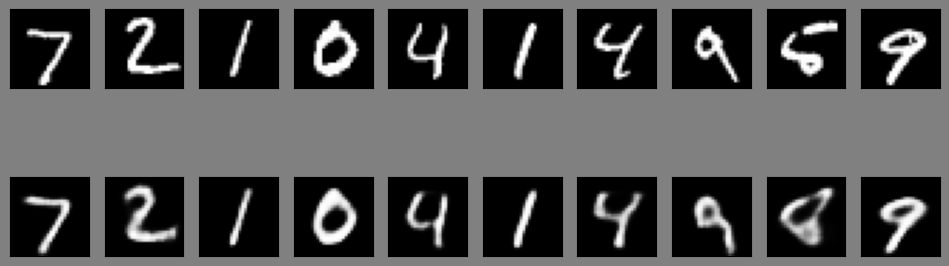

In [18]:
decoded_imgs = autoencoder.predict(x_test)

n = 10

plt.figure(figsize=(12, 4), facecolor='gray')
for i in range(n):
    # display original
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # display reconstruction
    ax = plt.subplot(2, n, i+1+n)
    plt.imshow(decoded_imgs[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)


In [19]:
autoencoder.fit(x_train, x_train,  epochs=1, batch_size=64, shuffle=True, verbose=1, validation_data=(x_test, x_test))

938/938 [==============================] - 12s 13ms/step - loss: 0.1031 - accuracy: 0.8118 - val_loss: 0.1018 - val_accuracy: 0.8109


313/313 [==============================] - 1s 3ms/step


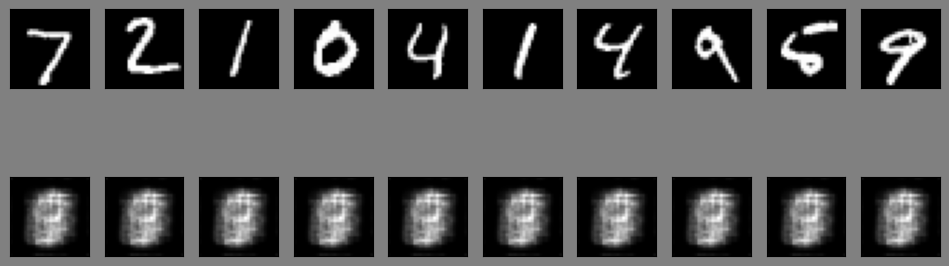

In [45]:
decoded_imgs = autoencoder.predict(x_test)

n = 10

plt.figure(figsize=(12, 4), facecolor='gray')
for i in range(n):
    # display original
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # display reconstruction
    ax = plt.subplot(2, n, i+1+n)
    plt.imshow(decoded_imgs[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)


313/313 [==============================] - 1s 2ms/step


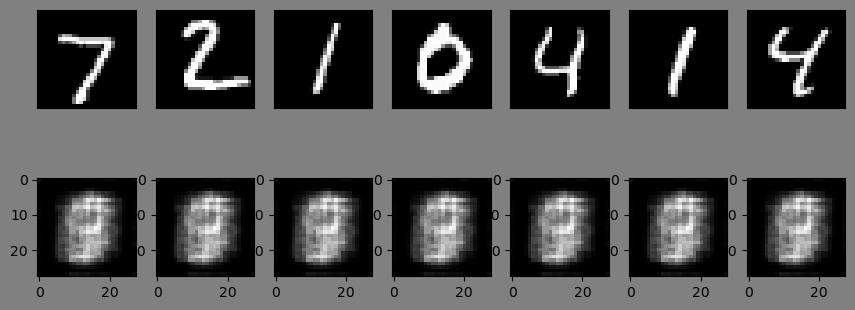

In [52]:
decoded_imgs = autoencoder.predict(x_test)

n = 10

plt.figure(figsize=(15, 4), facecolor='gray')
for i in range(7):
    # display original
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # display reconstruction
    ax = plt.subplot(2, n, i+1+n)
    plt.imshow(decoded_imgs[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(True)
    ax.get_yaxis().set_visible(True)